## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Kelvin Waters
# Online FT 01/21/20 cohort
# Once submitted
# Abhineet Kulkarni

### Best practice to import all the necessary files up top ###

In [2]:
from importlib import reload

import sqlite3
import calendar
import pandas as pd
import numpy as np
import helper_functions as hf

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
%matplotlib inline

import squarify
import seaborn as sns
sns.set(style= 'ticks', color_codes= True)

### This line will preload the helper_functions.py (table_list, load_table, and convert_dollars_to_int) within this notebook directory ###

In [3]:
# can't mask this from displaying desktop dir information
reload(hf)

<module 'helper_functions' from 'C:\\Users\\kelvi\\flatiron\\section01\\dsc-mod-1-project-v2-1-online-ds-ft-120919\\helper_functions.py'>

### Preview tables with a .head(2) to preview table data, and the avaiable columns ###

In [4]:
# head(2) is preferable the default (5) is too large and you'd have to scroll between the datasets which I will have to
# perform during the EDA phase anyway

def preview_tables(conn, tables='all'):
    all_tables = hf.get_table_list(conn)
    if tables=='all':
        final_table_names = all_tables
        
    elif type(tables) == list:
        final_table_names = [t for t in all_tables if t in tables]
    
    for table_name in final_table_names:
        print(f"Showing Table: {table_name}")
        query = f"select * from {table_name};"
        df = pd.read_sql(query, conn)
        display(df.head(2))
        print("-"*100)
    print("finished")
    return None

In [5]:
# sqlite connection
conn = sqlite3.Connection("movies_db.sqlite")
c = conn.cursor()

In [6]:
# loads all tables 
table_names = hf.get_table_list(conn)
table_names

['bom_movie_gross',
 'name_basics',
 'title_akas',
 'title_basics',
 'title_crew',
 'title_principals',
 'title_ratings',
 'tmdb_movies',
 'tn_movie_budgets']

In [7]:
# again preview tables set to head(2) for a quick glance at some data and define the cols
preview_tables(conn, tables= 'all')

Showing Table: bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


----------------------------------------------------------------------------------------------------
Showing Table: name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


----------------------------------------------------------------------------------------------------
Showing Table: title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0


----------------------------------------------------------------------------------------------------
Showing Table: title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


----------------------------------------------------------------------------------------------------
Showing Table: title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"


----------------------------------------------------------------------------------------------------
Showing Table: title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None


----------------------------------------------------------------------------------------------------
Showing Table: title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


----------------------------------------------------------------------------------------------------
Showing Table: tmdb_movies


,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


----------------------------------------------------------------------------------------------------
Showing Table: tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


----------------------------------------------------------------------------------------------------
finished


### <u>Scenario</u>: Microsoft is interested in the film industry and wants to know what types of movies provide the most bang for the production buck at the box office. 

### I will determine which studios are productive based on a number of factors and gather what specific types of movies are driving their subsequent success. 

### From the following table data: 

1. **bom_movie_gross:** 
     title, studio, domestic_gross, foreign_gross, year
    
2. **tn_movie_budgets:**
    id, release_date, movie, production_budget, domestic_gross, worldwide_gross
    
1. **tmdb_movies:**
     index, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count
    
1. **title_ratings:**
     tconst, averagerating, numvotes
    
1. **title_basics:**
     tconst,	primary_title, original_title, start_year, runtime_minutes, genres
     
### I will attempt to answer the following Questions? ###
1. Who are the top studios in the industry, what are some of their top successes, does vote count and popularity equate to positive box office receipts?
2. What is the best/worst time to release a film?
3. Does a domestic films popularity correlate to big box office numbers here in the States?


EDA Blog https://medium.com/@kelvin.waters/flatiron-module-1-project-blog-4ac4410075

### EDA on the various tables###

### bom_movie_gross table###

#### df.head() ###

In [8]:
# initial table data
# df rolling naming convention being adapted
bom_movie_gross = hf.load_table(conn, "bom_movie_gross")
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### df.shape() ###

In [9]:
# ascertain the initial shape of the data before altering anything! 
bom_movie_gross.shape

(3387, 5)

#### df.info() ####

In [10]:
# basic table info 
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### df.isna() ####

In [11]:
# chainning methods to obtain the percentage of missing data
# foreign_gross has almost 40% missing NOT planning on using this column
# since there is a worldwide_gross series(cols) on another table
bom_movie_gross.isna().mean().round(4)* 100

title              0.00
studio             0.15
domestic_gross     0.83
foreign_gross     39.86
year               0.00
dtype: float64

#### df.groupby() to determine studio values ####

In [12]:
# studio count
# it's obvious some studio's are making a lot of films
# I wonder if that automatically correalates into positive numbers
bom_movie_gross.groupby('studio')['studio'].agg('count')

studio
3D        1
A23       2
A24      49
ADC       2
AF        6
         ..
XL        2
YFG       1
Yash     14
Zee       1
Zeit.    16
Name: studio, Length: 257, dtype: int64

#### df.dropna() ####
#### this drop would result in a significant loss of data, namely 1380 rows! ####

In [13]:
# dropping NaN's from domestic_gross and the 5 missing studio values
# bom_movie_gross = bm.dropna()

#### df.drop() ####

In [14]:
# dropping foreign gross from table > 30% NaN
# bom_movie_gross = bom_movie_gross.drop(['foreign_gross'], axis='columns')

#### going to have to ignore the foreign_gross series/cols and retain the 1300+ rows of data! ####

In [15]:
# imperative to always verify the shape of the data with every preposed change
bom_movie_gross.shape

(3387, 5)

In [16]:
# from this table alone, I am able to determine the top production studio's based
# on the domestic_growth col. Once this table is joined with the worldwide_gross and 
# production_costs are calculated this list may change. 
df = bom_movie_gross.groupby('studio')['domestic_gross'].agg('sum').sort_values(ascending= False)
df.head()

studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.459683e+09
Name: domestic_gross, dtype: float64

### tmdb_movies table ###

####  df.head() ####

In [17]:
# initial table data, noting the cols/series I can utilize for my analysis
# I may need to strip and or tally these genre_ids with the title 
# or find some other source for the genre_ids values
tmdb_movies = hf.load_table(conn, "tmdb_movies")
tmdb_movies.head()

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### df.shape() ####

In [18]:
# initial shape before messing things up
tmdb_movies.shape

(26517, 10)

#### df.info() ####

In [19]:
# table info, taking note of the dtypes 
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
index                26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### df.isna() ####

In [20]:
# no missing data from this table!
tmdb_movies.isna().mean().round(4)* 100

index                0.0
genre_ids            0.0
id                   0.0
original_language    0.0
original_title       0.0
popularity           0.0
release_date         0.0
title                0.0
vote_average         0.0
vote_count           0.0
dtype: float64

### tn_movie_budgets table ###

In [21]:
# load table
tn_movie_budgets = hf.load_table(conn, "tn_movie_budgets")

#### This code changes these str monetary values into int64 nummerical datatype via astype in the helper_function.py within the dir of this notebook####

In [22]:
# helper functions to change these datatypes from str monetary values to int64
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    tn_movie_budgets = hf.convert_dollars_to_int(tn_movie_budgets, col)

#### df.head() ####

In [23]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


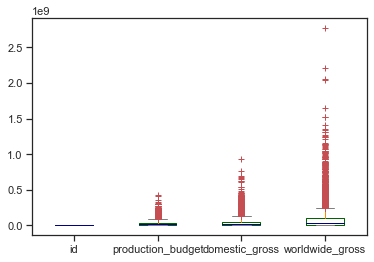

In [24]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
tn_movie_budgets.plot.box(color=color, sym='r+')

#### df.shape() ####

In [25]:
# initial shape before muking around
tn_movie_budgets.shape

(5782, 6)

#### df.info() ####

In [26]:
# release_date and movie are type object
# production_budget, domestic_gross, and worldwide_gross has been successfully converted to int64 numerical type
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


#### df.isna() ####

In [27]:
# this table isn't missing any data as well! 
# chainging methods
tn_movie_budgets.isna().mean().round(4)* 100

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [28]:
# adding a new col/series with the net gross ie profit
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] + tn_movie_budgets['domestic_gross'] - tn_movie_budgets['production_budget']

#### df.head() ###

In [29]:
# df head has been altered to include a new series = profit
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


In [30]:
tn_movie_budgets.worldwide_gross.describe()

count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64

In [31]:
tn_movie_budgets.rename(columns={'movie':'title'}, inplace=True)

### title_basics table ###

#### df.head() ####

In [32]:
# load table
title_basics = hf.load_table(conn, "title_basics")
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### df.shape() ####

In [33]:
# initial shape of the data
title_basics.shape

(146144, 6)

#### df.info() ####

In [34]:
# basic table info
# taking note of the datatypes
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


#### df.isna() ####

In [35]:
# runtime_minutes is missing nearly 22% data
# genres are missing 4% very workable
# chaining methods for better results
title_basics.isna().mean().round(4)* 100

tconst              0.00
primary_title       0.00
original_title      0.01
start_year          0.00
runtime_minutes    21.72
genres              3.70
dtype: float64

In [36]:
title_basics.rename(columns= {'primary_title':'title'}, inplace= True)

#### genres col/series is a bit of a problem with multiple values, here I am splitting up the series and will concat these values later ###

In [37]:
# a single movie can be both an action, crime, and a drama!
title_basics_split = title_basics.genres.str.split(pat= ",", n=-1, expand=True)
title_basics_split

,0,1,2
0,Action,Crime,Drama
1,Biography,Drama,None
2,Drama,None,None
3,Comedy,Drama,None
4,Comedy,Drama,Fantasy
...,...,...,...
146139,Drama,None,None
146140,Documentary,None,None
146141,Comedy,None,None
146142,None,None,None


#### successfully concatenated the values back into the dataframe, at this point I could remove the genres series/col ####

In [38]:
# now I'll have to figure out a way to tally genres per movie title once I join the studio values 
# to this table
title_basics_concat = pd.concat([title_basics, title_basics_split], axis = 1)
title_basics_concat

,tconst,title,original_title,start_year,runtime_minutes,genres,0,1,2
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Drama,None,None
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Documentary,None,None
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Comedy,None,None
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,None,None,None


### title_ratings table###

#### df.head() ####

In [39]:
# load the table
title_ratings = hf.load_table(conn, "title_ratings")
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### df.shape() ####

In [40]:
# initial shape
title_ratings.shape

(73856, 3)

#### df.info() ####

In [41]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### df.isna() ####

In [42]:
# no missing data from this table
title_ratings.isna().mean().round(4)* 100

tconst           0.0
averagerating    0.0
numvotes         0.0
dtype: float64

#### let's rename averagerating series to average_rating that way it'll match the other naming conventions ####

In [43]:
# renaming col
title_ratings.rename(columns={'averagerating': 'average_rating'}, inplace= True)

In [44]:
# taking another look at the df head
title_ratings.head()

,tconst,average_rating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [45]:
title_ratings.average_rating.describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: average_rating, dtype: float64

### name_basics table ###

#### df.head() ####

In [46]:
# load the table data
name_basics = hf.load_table(conn, "name_basics")
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


#### name_basics 'known_for_titles' col has indentical values as tconst on subsequesnt table, hence the rename ####

In [47]:
# renaming known_for_titles as tconst
# now I have to link these tconst values to the appropriate studio and movie title
name_basics.rename(columns={'known_for_titles': 'tconst'}, inplace=True)

In [48]:
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,tconst
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


#### df.shape() ####

In [49]:
# initial table size
name_basics.shape

(606648, 6)

##### df.info() ####

In [50]:
# table info some missing data
# notice data types
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
tconst                576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


#### df.isna() ####

In [51]:
# birth_year more than 86% missing 
# death_year more than 98% missing 
name_basics.isna().mean().round(4)* 100

nconst                 0.00
primary_name           0.00
birth_year            86.36
death_year            98.88
primary_profession     8.46
tconst                 4.98
dtype: float64

In [52]:
# split primary_professon cols into mulitple cols in order 
# to deal with numerous values on a row
name_basics_split = name_basics.primary_profession.str.split(pat= ",", n=-1, expand=True)
name_basics_split

,0,1,2
0,miscellaneous,production_manager,producer
1,composer,music_department,sound_department
2,miscellaneous,actor,writer
3,camera_department,cinematographer,art_department
4,production_designer,art_department,set_decorator
...,...,...,...
606643,actress,None,None
606644,actress,None,None
606645,actress,None,None
606646,producer,None,None


#### concat nb, nb1 trying to deal with multiple values in a row ####

In [53]:
# succcessfully concatenated the df can remove the primary_profession col at this point
# may rename one or more of the other cols not sure which entry would be considered the 
# primary profession
name_basics_concat = pd.concat([name_basics, name_basics_split], axis = 1)
name_basics_concat

,nconst,primary_name,birth_year,death_year,primary_profession,tconst,0,1,2
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",miscellaneous,production_manager,producer
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",composer,music_department,sound_department
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898",miscellaneous,actor,writer
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387",camera_department,cinematographer,art_department
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256",production_designer,art_department,set_decorator
...,...,...,...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,None,actress,None,None
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130",actress,None,None
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610",actress,None,None
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,None,producer,None,None


#### df.head() ####

In [54]:
# taking another look at the df
name_basics_concat.head()

,nconst,primary_name,birth_year,death_year,primary_profession,tconst,0,1,2
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",miscellaneous,production_manager,producer
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",composer,music_department,sound_department
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898",miscellaneous,actor,writer
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387",camera_department,cinematographer,art_department
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256",production_designer,art_department,set_decorator


#### new approach to pulling out director data ####

In [55]:
# # can actually search the primary_profession series for 'director'
# # this may be a better approach
# # name_basics known_for_titles (rename to tconst) col looks familiar to tconst tt values on title_basics join on tconst, 
# # change title_basics primary_title to just title then join bom_tn_movie_merge on title, that way I can tie directors to studios to films
# directors = name_basics.primary_profession.isin(['director'])
# name_basics[directors]

In [56]:
# change of plans, just use sql on name_basics table WHERE primary_profession = 'director'
# name_basics_dir = name_basics[directors]
# name_basics_dir

### title_akas table ###

In [57]:
# load table
title_akas = hf.load_table(conn, "title_akas")
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


#### df.shape() ####

In [58]:
# initial table size
title_akas.shape

(331703, 8)

#### df.info() ####

In [59]:
# taking note of dtypes and cols
# title_id data is the same as tconst values on other tables
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


#### df.isna() ####

In [60]:
# title_id (tconst) looks viable 
# is_original_title could ad some demensions to a question
# languge, types, and attributes are missing > 30% these values aren't being considered
title_akas.isna().mean().round(4)* 100

title_id              0.00
ordering              0.00
title                 0.00
region               16.07
language             87.42
types                49.22
attributes           95.50
is_original_title     0.01
dtype: float64

In [61]:
# duplicates! 
title_akas.title_id.head()

0    tt0369610
1    tt0369610
2    tt0369610
3    tt0369610
4    tt0369610
Name: title_id, dtype: object

#### df.duplicated() ####

In [62]:
title_akas.duplicated(['title_id','title'], keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
331698     True
331699    False
331700    False
331701     True
331702    False
Length: 331703, dtype: bool

#### df.drop_duplicates() ####

In [63]:
title_akas.drop_duplicates(['title_id', 'title'], keep='first', inplace=True)

#### df.shape() ####

In [64]:
title_akas.shape

(266869, 8)

In [65]:
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


#### title_id and tconst values are identical values it seems ####

In [66]:
# renaming for merging purposes
title_akas.rename(columns={'title_id': 'tconst'}, inplace=True)
title_akas

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331695,tt9755806,2,Большая Акула,RU,None,None,None,0.0
331697,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0


### title_crew table ###

In [67]:
# this table is useless!
# where are these values stored so I can cross ref'em?
title_crew = hf.load_table(conn, "title_crew")
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


#### this merge ought to answer which studio is most productive using simple calculations of the sum of domestic_gross, and worldwide_gross - production_budget ####

In [68]:
# question 1 answer
bom_tn_movie_merge = pd.merge(bom_movie_gross, tn_movie_budgets, on= 'title')
bom_tn_movie_merge.shape

(1247, 11)

In [69]:
# title_basics_genres = title_basics_concat.drop(['genres'], axis='columns')
# title_basics_genres

In [70]:
# # renaming primary_title to title for convience and possible merge
# # merging on non-numerical values isn't ideal. 
# title_basics_genres.rename(columns={'primary_title':'title'}, inplace=True)

#### Here are my two sql created dataframes, this is by far the best approach to selecting specific data for a set of questions ####

In [71]:
title_akas.columns

Index(['tconst', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')

In [72]:
bom_tn_movie_merge.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'profit'],
      dtype='object')

In [73]:
title_akas_bom_tn = pd.merge(bom_tn_movie_merge, title_akas, on= "title")
title_akas_bom_tn

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,profit,tconst,ordering,region,language,types,attributes,is_original_title
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",200000000,415004880,1068879522,1283884402,tt0435761,15,DK,None,None,None,0.0
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",160000000,292576195,835524642,968100837,tt1375666,20,None,None,original,None,1.0
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",165000000,238736787,756244673,829981460,tt0892791,16,None,None,original,None,1.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",68000000,300531751,706102828,938634579,tt1325004,10,IT,None,imdbDisplay,None,0.0
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",170000000,312433331,621156389,763589720,tt1228705,11,AR,None,None,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,Gotti,VE,4300000.0,None,2018,64,"Jun 15, 2018",10000000,4286367,6089100,375467,tt1801552,12,DE,None,imdbDisplay,None,0.0
1683,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",30000000,490973,648599,-28860428,tt3576728,12,None,None,original,None,1.0
1684,Mandy,RLJ,1200000.0,None,2018,71,"Sep 14, 2018",6000000,1214525,1427656,-3357819,tt4995858,1,US,None,None,None,0.0
1685,Mandy,RLJ,1200000.0,None,2018,71,"Sep 14, 2018",6000000,1214525,1427656,-3357819,tt6998518,10,DE,None,imdbDisplay,None,0.0


In [74]:
# great helper function 
# good not having to scroll back to the top of the page for the list of tables
table_names

['bom_movie_gross',
 'name_basics',
 'title_akas',
 'title_basics',
 'title_crew',
 'title_principals',
 'title_ratings',
 'tmdb_movies',
 'tn_movie_budgets']

#### sql query for question on origianl titles vs non original titles at the box office ####

In [75]:
query = """SELECT title_id,
        title,
        production_budget,
        domestic_gross,
        worldwide_gross
        FROM title_akas
        JOIN tn_movie_budgets
        ON (title)
        WHERE is_original_title = '0'
        """
df = pd.read_sql(query, conn)
df

,title_id,title,production_budget,domestic_gross,worldwide_gross
0,tt0312305,2004: A Light Knight's Odyssey,"$425,000,000","$760,507,625","$2,776,345,279"
1,tt0315642,64 Squares,"$425,000,000","$760,507,625","$2,776,345,279"
2,tt0360556,451 stepen Farenhajta,"$425,000,000","$760,507,625","$2,776,345,279"
3,tt0360556,451 градус за Фаренгейтом,"$425,000,000","$760,507,625","$2,776,345,279"
4,tt0360556,451 градуса по Фаренхайт,"$425,000,000","$760,507,625","$2,776,345,279"
...,...,...,...,...,...
25417667,tt9817300,15 August,"$1,100","$181,041","$181,041"
25417668,tt9817300,15 sierpnia,"$1,100","$181,041","$181,041"
25417669,tt9817300,15 Αυγούστου,"$1,100","$181,041","$181,041"
25417670,tt9843984,2036 Apocalypse Earth,"$1,100","$181,041","$181,041"


In [76]:
tn_movie_budgets.head(2)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750


#### Need to stop living in my own bubble, looking at the data and assuming that Alice in Wonderland are duplicates or that John Carter is an original film not based off a 1912 book "A Princess of Mars" simply cause I know of the film, and not the book! ####

In [77]:
fms = pd.merge(title_akas, tn_movie_budgets, on= 'title')
fms

,tconst,ordering,title,region,language,types,attributes,is_original_title,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0,34,"Jun 12, 2015",215000000,652270625,1648854864,2086125489
1,tt0401729,16,John Carter,PT,None,imdbDisplay,None,0.0,14,"Mar 9, 2012",275000000,73058679,282778100,80836779
2,tt1014759,37,Alice in Wonderland,US,None,None,None,0.0,51,"Mar 5, 2010",200000000,334191110,1025491110,1159682220
3,tt1014759,37,Alice in Wonderland,US,None,None,None,0.0,60,"Jul 28, 1951",3000000,0,0,-3000000
4,tt1926979,1,Alice in Wonderland,US,None,None,None,0.0,51,"Mar 5, 2010",200000000,334191110,1025491110,1159682220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,tt3973612,2,Stories of Our Lives,None,None,original,None,1.0,62,"Dec 31, 2014",15000,0,0,-15000
4139,tt4651520,23,Bad Moms,None,None,original,None,1.0,99,"Jul 29, 2016",20000000,113257297,180998716,274256013
4140,tt5462602,17,The Big Sick,US,None,imdbDisplay,None,0.0,64,"Jun 23, 2017",5000000,42872467,53972860,91845327
4141,tt5649108,2,Thoroughbreds,US,None,None,None,0.0,47,"Mar 9, 2018",5000000,3072605,3187302,1259907


In [78]:
franchise_film = fms[fms.is_original_title == 0]
franchise_film.head(2)

,tconst,ordering,title,region,language,types,attributes,is_original_title,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0,34,"Jun 12, 2015",215000000,652270625,1648854864,2086125489
1,tt0401729,16,John Carter,PT,None,imdbDisplay,None,0.0,14,"Mar 9, 2012",275000000,73058679,282778100,80836779


In [79]:
# good shape, more than enough rows
franchise_film.shape

(3282, 14)

In [80]:
# 1381 duplicated title cols
# will limit my search to 100 so isn't going to be an issue
franchise_film.title.duplicated().sum()

1381

In [81]:
# no rows/cols values are duplicated
franchise_film.duplicated().sum()

0

In [82]:
# should show 0 entries
franchise_film.loc[franchise_film.duplicated(), :]

,tconst,ordering,title,region,language,types,attributes,is_original_title,id,release_date,production_budget,domestic_gross,worldwide_gross,profit


In [83]:
franchise_film.drop_duplicates().shape

(3282, 14)

In [84]:
type(franchise_film)

pandas.core.frame.DataFrame

In [85]:
franchise_film.columns

Index(['tconst', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title', 'id', 'release_date',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'profit'],
      dtype='object')

In [86]:
is_original_false = franchise_film.sort_values(by='profit', ascending=False)
['title'][:25]
is_original_false.head(5)

,tconst,ordering,title,region,language,types,attributes,is_original_title,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
596,tt1775309,2,Avatar,XWW,en,imdbDisplay,None,0.0,1,"Dec 18, 2009",425000000,760507625,2776345279,3111852904
2590,tt2495766,1,Titanic,GB,None,None,None,0.0,43,"Dec 19, 1997",200000000,659363944,2208208395,2667572339
4074,tt4154756,10,Avengers: Infinity War,AR,None,imdbDisplay,None,0.0,7,"Apr 27, 2018",300000000,678815482,2048134200,2426949682
0,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0,34,"Jun 12, 2015",215000000,652270625,1648854864,2086125489
1775,tt2905856,4,Black Panther,XWW,en,alternative,None,0.0,42,"Feb 16, 2018",200000000,700059566,1348258224,1848317790


#### FutureWarning:???!!! ####

In [87]:
# FutureWarning: 
# Passing list-likes to .loc or [] with any missing label will raise
# KeyError in the future, you can use .reindex() as an alternative.
is_original_false.loc[is_original_false.profit, 'title']

C:\Users\kelvi\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


 3111852904    NaN
 2667572339    NaN
 2426949682    NaN
 2086125489    NaN
 1848317790    NaN
              ... 
-71224295      NaN
-89057484      NaN
-90000000      NaN
-103800000     NaN
-157475300     NaN
Name: title, Length: 3282, dtype: object

In [88]:
original_title = fms[fms.is_original_title == 1]
original_title.head(2)

,tconst,ordering,title,region,language,types,attributes,is_original_title,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
8,tt1194173,32,The Bourne Legacy,None,None,original,None,1.0,76,"Aug 10, 2012",125000000,113203870,280355920,268559790
9,tt1219289,19,Limitless,None,None,original,None,1.0,91,"Mar 18, 2011",27000000,79249455,155564919,207814374


In [89]:
original_title.shape

(860, 14)

#### testing is_original series #### 

In [90]:
# 1 == True
bool(1)

True

In [91]:
# 0 == False
bool(0)

False

In [92]:
# rechecking avaiable columns
bom_tn_movie_merge.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'profit'],
      dtype='object')

#### Question 3. Does a domestic film popularity equate to local big box office numbers? ####

In [93]:
# must have removed this merge, subsequent cells below indicating that tmdb_bom_merge 
# didn't exist. Naming convention to the rescue!
tmdb_bom_merge = pd.merge(tmdb_movies, bom_movie_gross, on='title')

In [94]:
tmdb_bom_merge['pop/dom_gross'] = tmdb_bom_merge['popularity'] / tmdb_bom_merge['domestic_gross'] 

In [95]:
tmdb_bom_merge.columns

Index(['index', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'studio', 'domestic_gross', 'foreign_gross', 'year', 'pop/dom_gross'],
      dtype='object')

In [96]:
# how does this correalate to box office receipts? Profits?
# this is limited to domestic_gross and I can't see a correalation at all can't figure out how to even graph this! 
# further research would be to compare other markets and to improve what contitutes a good popularity rating.  
pop = tmdb_bom_merge.groupby(['title', 'domestic_gross', 'pop/dom_gross'])['popularity'].agg('sum').sort_values(ascending= False)
pop.head(25)

title                                        domestic_gross  pop/dom_gross
Blade Runner 2049                            92100000.0      5.273724e-07     97.142
Thor: Ragnarok                               315100000.0     1.378927e-07     86.900
Avengers: Infinity War                       678800000.0     1.189938e-07     80.773
John Wick                                    43000000.0      1.816814e-06     78.123
Big Hero 6                                   222500000.0     1.659326e-07     73.840
Justice League                               229000000.0     1.526332e-07     69.906
Star Wars: The Last Jedi                     620200000.0     5.529345e-08     68.586
Doctor Strange                               232600000.0     1.420249e-07     66.070
Star Wars: The Force Awakens                 936700000.0     3.446247e-08     64.562
Spectre                                      200100000.0     1.515142e-07     60.636
Your Name.                                   5000000.0       5.647600e-06  

In [97]:
pop = tmdb_bom_merge.groupby('title')['domestic_gross'].agg('sum').sort_values(ascending= False)
pop.head(25)

title
Star Wars: The Force Awakens             1.873400e+09
Black Panther                            1.400200e+09
Star Wars: The Last Jedi                 1.240400e+09
Rogue One: A Star Wars Story             1.064400e+09
Wonder Woman                             8.252000e+08
Jumanji: Welcome to the Jungle           8.090000e+08
Frozen                                   8.014000e+08
Moana                                    7.464000e+08
Inside Out                               7.130000e+08
American Sniper                          7.002000e+08
Avengers: Infinity War                   6.788000e+08
It                                       6.550000e+08
Jurassic World                           6.523000e+08
Thor: Ragnarok                           6.302000e+08
Incredibles 2                            6.086000e+08
The Hunger Games: Mockingjay - Part 2    5.634000e+08
Split                                    5.532000e+08
Sing                                     5.408000e+08
Finding Dory          

In [98]:
type(pop)

pandas.core.series.Series

In [99]:
# note sure how votes are tallied and how much weight it carries
vote_average = tmdb_bom_merge.groupby('title')['vote_average'].agg('sum').sort_values(ascending= False)
vote_average.head(25)

title
Eden                     34.6
Legend                   32.2
Truth or Dare            28.5
Nerve                    27.1
Truth                    26.6
Spotlight                25.6
The Void                 24.9
Paranoia                 24.7
Elena                    23.7
Solace                   23.6
Split                    22.3
Custody                  21.7
Extraction               21.5
Moana                    21.5
Shame                    21.3
The Lure                 21.0
The Salesman             20.8
Noah                     20.7
In Bloom                 20.5
Marguerite               20.5
Noble                    20.4
Infinitely Polar Bear    20.4
Colossal                 20.2
Youth                    19.9
Gold                     19.6
Name: vote_average, dtype: float64

In [100]:
# not enough data here
# what is the weight of a single vote? 
vote_count = tmdb_bom_merge.groupby('title')['vote_count'].agg('sum').sort_values(ascending= False)
vote_count.head()

title
Star Wars: The Force Awakens    25282
Doctor Strange                  25164
The Martian                     24344
Thor: Ragnarok                  22760
Inception                       22186
Name: vote_count, dtype: int64

#### merging name_basics title_principals via sql ####

In [101]:
query = """SELECT primary_name, 
            primary_profession, 
            known_for_titles, 
            tconst
            FROM name_basics 
            JOIN title_principals
            USING (nconst)
            WHERE primary_profession = 'director'
            """
name_basics_title_principals = pd.read_sql(query, conn)
name_basics_title_principals.head()

,primary_name,primary_profession,known_for_titles,tconst
0,Kyle Lollis,director,None,tt10122042
1,Verma Vivek,director,tt1451707,tt10133066
2,Inayat Shaikh,director,None,tt10163206
3,Shakir Shaikh,director,None,tt10163206
4,James Snider,director,"tt10187780,tt9306714,tt8850510,tt9465532",tt10187822


In [102]:
# taken note of merged dataframe shape
name_basics_title_principals.shape

(10023, 4)

#### joining tables title_basics title_ratings through sql query ####

In [103]:
query = """SELECT original_title, 
        start_year,
        runtime_minutes,
        genres,
        numvotes,
        averagerating,
        tconst
        FROM title_basics
        JOIN title_ratings
        USING (tconst)
        """
title_basics_title_ratings = pd.read_sql(query, conn)
title_basics_title_ratings.head(2)

,original_title,start_year,runtime_minutes,genres,numvotes,averagerating,tconst
0,Sunghursh,2013,175.0,"Action,Crime,Drama",77,7.0,tt0063540
1,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",43,7.2,tt0066787


In [104]:
dir_name_genre = pd.merge(name_basics_title_principals,title_basics_title_ratings, on= 'tconst' )
dir_name_genre.head(2)

,primary_name,primary_profession,known_for_titles,tconst,original_title,start_year,runtime_minutes,genres,numvotes,averagerating
0,Kyle Lollis,director,None,tt10122042,Kingdom Men Rising,2019,93.0,Documentary,30,8.0
1,Kazuaki Ue,director,tt1606197,tt1606197,Dârin wa gaikokujin,2010,100.0,Comedy,429,6.1


In [105]:
# displaying columns for data that I can work with
dir_name_genre.columns

Index(['primary_name', 'primary_profession', 'known_for_titles', 'tconst',
       'original_title', 'start_year', 'runtime_minutes', 'genres', 'numvotes',
       'averagerating'],
      dtype='object')

In [106]:
# another potential question 
dir_name_genre.groupby(['primary_name', 'original_title']).runtime_minutes.mean()

primary_name    original_title                                                  
A. Joji         Oru Caribbean Udayippu                                              131.0
A. Liong Wong   13 cara memanggil setan                                              80.0
A.N. Other      Julian Assange: A Modern Day Hero? Inside the World of Wikileaks    114.0
A.R. Rajasekar  Uyire.. Uyire..                                                       NaN
A.V. Sasidaran  Olipporu                                                            109.0
                                                                                    ...  
Éric Nadler     Armes Chimiques Sous La Mer                                           NaN
Özer Kiziltan   Askin 5 Hali                                                          NaN
                Beni Unutma                                                         100.0
                Mahrumlar                                                           121.0
Özlem Kayhan    3 v

In [107]:
# investigating another potention question
avg = dir_name_genre.averagerating.value_counts(normalize=True)

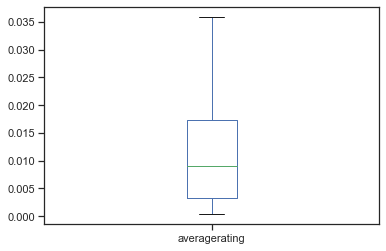

In [108]:
avg.plot.box()

#### new question what are the best months to release a film ####

In [109]:
# release date is an object! 
bom_tn_movie_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 11 columns):
title                1247 non-null object
studio               1246 non-null object
domestic_gross_x     1245 non-null float64
foreign_gross        1086 non-null object
year                 1247 non-null int64
id                   1247 non-null int64
release_date         1247 non-null object
production_budget    1247 non-null int64
domestic_gross_y     1247 non-null int64
worldwide_gross      1247 non-null int64
profit               1247 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 116.9+ KB


In [110]:
# changing release_date to a datetime obj
bom_tn_movie_merge['release_date'] = pd.to_datetime(bom_tn_movie_merge['release_date'])

In [111]:
# confirm that release_date is now a datetime obj
bom_tn_movie_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 11 columns):
title                1247 non-null object
studio               1246 non-null object
domestic_gross_x     1245 non-null float64
foreign_gross        1086 non-null object
year                 1247 non-null int64
id                   1247 non-null int64
release_date         1247 non-null datetime64[ns]
production_budget    1247 non-null int64
domestic_gross_y     1247 non-null int64
worldwide_gross      1247 non-null int64
profit               1247 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 116.9+ KB


#### abandoned trying to bridge this data with the name_basics table for movie director question, have a use for this data afterall ####

In [112]:
# released month added to the table
bom_tn_movie_merge.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'profit'],
      dtype='object')

#### this will provide the month in date format as an int value, provided calendar is imported ####

In [113]:
bom_tn_movie_merge['release_month'] = bom_tn_movie_merge['release_date'].map(lambda x : x.month)

#### this ought to change the numerical month to an abbreviation str month value ####

In [114]:
# TypeError: list indices must be integers or slices, not str
# but it still works?! 
bom_tn_movie_merge['release_month'] = bom_tn_movie_merge['release_month'].apply(lambda x : calendar.month_abbr[x])

In [115]:
# good workable shape 1247 rows
bom_tn_movie_merge.shape

(1247, 12)

#### Question 2: Is there a good time to release a movie? ####

In [116]:
# Jun, Nov, July, Dec, and May are the best times to release a new film!
best_time_to_release = bom_tn_movie_merge.groupby('release_month')['profit'].agg('sum').sort_values(ascending=False)

In [117]:
# Now to change numerical month to str month abbreviation
best_time_to_release

release_month
Jun    30425085643
Nov    26538590451
Jul    25852570780
Dec    23649060864
May    21079955970
Mar    13574124932
Apr    13201753763
Feb    13136353718
Aug    11339542316
Oct    11090898342
Sep     9487346736
Jan     7290541068
Name: profit, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

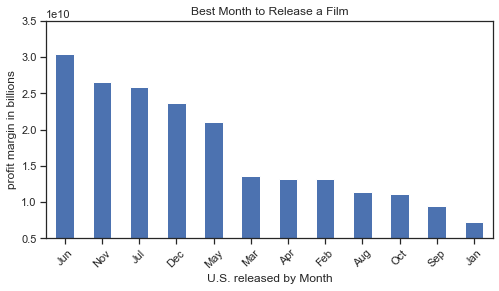

In [118]:
best_time_to_release.plot.bar(figsize=(8,4))
plt.title('Best Month to Release a Film')
plt.xlabel('U.S. released by Month')
plt.ylabel('profit margin in billions')
plt.xticks(rotation=45)

#### pie chart with the correct percentages that add up to 100% ####

Text(0.5, 1.0, 'Best month to release a film')

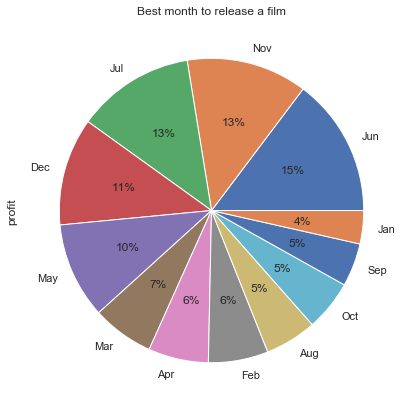

In [119]:
best_time_to_release.plot.pie(figsize=(15,7), autopct='%1.0f%%', pctdistance=.6)
plt.title('Best month to release a film')

In [120]:
# using these two table to combine studio and genres values
title_basics.columns

Index(['tconst', 'title', 'original_title', 'start_year', 'runtime_minutes',
       'genres'],
      dtype='object')

In [121]:
# 2 using these two tables to combine studio and genre values
bom_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [122]:
query = """SELECT primary_title,
        start_year,
        runtime_minutes,
        genres,
        studio,
        domestic_gross
        FROM title_basics
        JOIN bom_movie_gross
        ON (title)
"""
studio_genres = pd.read_sql(query, conn)
studio_genres.head(2)

,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross
0,Sunghursh,2013,175.0,"Action,Crime,Drama",FoxS,18300000.0
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",FoxS,18300000.0


In [123]:
# maybe a new path to a questio
df = studio_genres.groupby(['studio'])[['genres']]

#### exploring a better way to iterate through a series with multiple values perhaps spilting and tally the results in a single pass ####

In [124]:
# gotta be a way to interate through a series and tally results
count = 0

for i in studio_genres.genres:
    if i == 'Action':
        count = count + 1
print("Count of Action in studio_genres is: " + str(count))

Count of Action in studio_genres is: 124264


In [125]:
# may have to split this series, maybe in list format and tally results
# would like to then implement a treemap visual to tally results groupby genres, studio, directors...
word_counts = {}

for word in studio_genres.genres:
    word_counts[word] = word_counts.get(word, 0) + 1
print(word_counts)

{'Action,Crime,Drama': 40712, 'Biography,Drama': 16744, 'Drama': 1203216, 'Comedy,Drama': 197064, 'Comedy,Drama,Fantasy': 12376, 'Comedy': 513912, 'Horror,Thriller': 70168, 'Adventure,Animation,Comedy': 15680, 'Documentary,History': 72184, 'Biography': 28560, 'History': 23184, 'Documentary': 1802360, 'Animation,Drama,History': 280, None: 302848, 'Drama,Mystery': 17864, 'Action,Animation,Comedy': 2800, 'Crime,Drama': 40488, 'Biography,Comedy,Drama': 5320, 'Action,Drama': 30072, 'Sci-Fi': 39872, 'Thriller': 170576, 'Action,Adventure,Fantasy': 7952, 'Drama,Romance': 116424, 'Adventure,Animation,Sci-Fi': 728, 'Drama,Horror': 13664, 'Drama,Mystery,Thriller': 24528, 'Drama,Family': 43904, 'Adventure,Comedy,Romance': 1792, 'Adventure,Drama,Romance': 3640, 'Comedy,Crime,Drama': 17640, 'Horror': 244832, 'Adventure,Comedy,Drama': 11872, 'Drama,Sci-Fi,Thriller': 6496, 'Action': 124264, 'Comedy,Drama,Romance': 87248, 'Action,Adventure,Sci-Fi': 8512, 'Crime,Drama,Thriller': 37240, 'Comedy,Family': 

In [126]:
# haven't a clue what this is!
title_basics_split.columns

RangeIndex(start=0, stop=3, step=1)

#### not the effect I was expecting on title_basics_split ####

In [127]:
word_counts = {}

for word in title_basics_split:
    word_counts[word] = word_counts.get(word, 0) + 1

print(word_counts)

{0: 1, 1: 1, 2: 1}


#### able to split the series into other series, treemap visualization will ignore the None values as it tallies these occurances in a total ####

In [128]:
title_basics_split.head(25)

,0,1,2
0,Action,Crime,Drama
1,Biography,Drama,None
2,Drama,None,None
3,Comedy,Drama,None
4,Comedy,Drama,Fantasy
5,Comedy,None,None
6,Horror,Thriller,None
7,Adventure,Animation,Comedy
8,Documentary,History,None
9,Biography,None,None


#### Question 1: What are the Top 5 movie studios? ####

In [129]:
# Top five studios based on net gross
Top_5_studio = bom_tn_movie_merge.head().groupby('studio')['profit'].agg('sum').sort_values(ascending= False)
Top_5_studio

studio
BV      1283884402
WB       968100837
Sum.     938634579
P/DW     829981460
Par.     763589720
Name: profit, dtype: int64

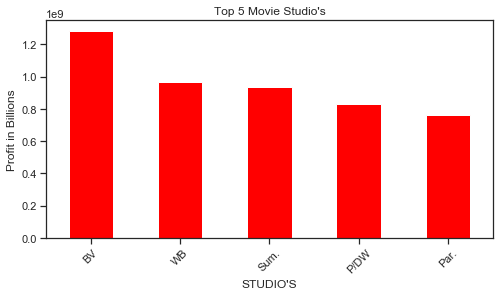

In [130]:
# top five studios
Top_5_studio.plot.bar(figsize=(8,4), color= 'red')
plt.title("Top 5 Movie Studio's")
plt.xlabel("STUDIO'S")
plt.xticks(rotation = 45)
plt.ylabel('Profit in Billions')
plt.style.use('ggplot') # this doesn't seem to be doing anything

#### pic charts are frowned upon cause without the percentage values it can hide the true distributions in each slice, all values must equal to 100% ####

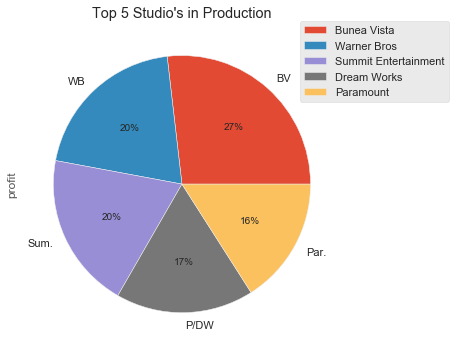

In [131]:
# gratuitous pie chart of the top 5 movie studios
Top_5_studio.plot.pie(figsize=(13,5), subplots=True, autopct='%1.0f%%', pctdistance=.6)
locs= ['upper left', 'lower left', 'center right']
plt.title("Top 5 Studio's in Production")
labels = ['Bunea Vista', 'Warner Bros', 'Summit Entertainment', 'Dream Works', 'Paramount']
plt.legend(labels, bbox_to_anchor=(0.85, 1.025), loc='upper left')
plt.tight_layout()

In [132]:
bom_tn_movie_merge.pivot_table(index='studio', margins= True)

,domestic_gross_x,domestic_gross_y,id,production_budget,profit,worldwide_gross,year
studio,,,,,,,
3D,6.100000e+06,6.096582e+06,31.000000,5.000000e+06,1.761178e+07,1.651520e+07,2010.000000
A24,1.141252e+07,1.141401e+07,48.095238,6.814286e+06,2.364760e+07,1.904788e+07,2015.523810
ALP,2.800000e+03,4.247200e+04,52.000000,2.600000e+07,-2.303357e+07,2.923959e+06,2011.000000
ATO,1.000000e+06,2.039869e+06,32.000000,1.250000e+07,-8.187945e+06,2.272186e+06,2010.000000
Affirm,1.170000e+07,1.167510e+07,53.500000,3.500000e+06,2.391085e+07,1.573575e+07,2017.500000
...,...,...,...,...,...,...,...
WB (NL),9.237027e+07,9.236838e+07,48.513514,5.807027e+07,2.651323e+08,2.308342e+08,2014.162162
WHE,3.830000e+05,3.829460e+05,54.000000,7.000000e+06,-6.234108e+06,3.829460e+05,2011.000000
Wein.,3.117979e+07,3.117447e+07,48.268293,2.043902e+07,7.951573e+07,6.878029e+07,2013.341463


In [133]:
# all the studios in a list obj
bom_tn_movie_merge.studio.unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'FoxS',
       'SGem', 'WB (NL)', 'LGF', 'MBox', 'W/Dim.', 'Focus', 'MGM',
       'Over.', 'Mira.', 'NM', 'CBS', 'SPC', 'ParV', 'Gold.', 'RAtt.',
       'Magn.', 'IFC', 'Free', '3D', 'Wein.', 'Rela.', 'Anch.', 'App.',
       'Drft.', 'IW', 'Relbig.', 'Viv.', 'Eros', 'Scre.', 'UTV', 'Kino',
       'ATO', 'First', 'GK', 'NFC', 'Strand', 'Mont.', 'IVP', 'FD',
       'TriS', 'ORF', 'Jan.', 'Osci.', 'OMNI/FSR', None, 'SMod', 'WHE',
       'P4', 'ALP', 'LG/S', 'RTWC', 'MNE', 'LD', 'Yash', 'IM', 'A24',
       'PH', 'EOne', 'ELS', 'CE', 'Saban', 'DR', 'Trib.', 'KE', 'VE',
       'EC', 'BG', 'PFR', 'BST', 'BH Tilt', 'BSC', 'FCW', 'Cohen', 'LGP',
       'TFA', 'Alc', 'STX', 'Orch.', 'PNT', 'CJ', 'Cleopatra', 'BBC',
       'GrtIndia', 'Neon', 'Affirm', 'ENTMP', 'Studio 8', 'Annapurna',
       'Global Road', 'Amazon', 'RLJ'], dtype=object)

In [134]:
# grouping by studio
g = bom_tn_movie_merge.groupby('studio')
g

#### setting up the studio's to pull indivdual data ####

In [135]:
# looping through all the studios and separating their data
# not very readable
for studio, studio in g:
    print(studio)
    print(bom_tn_movie_merge)

                                          title studio  domestic_gross_x  \
118  Sea Rex 3D: Journey to a Prehistoric World     3D         6100000.0   

    foreign_gross  year  id release_date  production_budget  domestic_gross_y  \
118       9900000  2010  31   2010-05-28            5000000           6096582   

     worldwide_gross    profit release_month  
118         16515203  17611785           May  
                           title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV       415000000.0     652000000  2010   
1                      Inception     WB       292600000.0     535700000  2010   
2            Shrek Forever After   P/DW       238700000.0     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.       300500000.0     398000000  2010   
4                     Iron Man 2   Par.       312400000.0     311500000  2010   
...                          ...    ...               ...           ...   ...   
1242                   

                           title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV       415000000.0     652000000  2010   
1                      Inception     WB       292600000.0     535700000  2010   
2            Shrek Forever After   P/DW       238700000.0     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.       300500000.0     398000000  2010   
4                     Iron Man 2   Par.       312400000.0     311500000  2010   
...                          ...    ...               ...           ...   ...   
1242                       Gotti     VE         4300000.0          None  2018   
1243                 Ben is Back  RAtt.         3700000.0          None  2018   
1244  Bilal: A New Breed of Hero     VE          491000.0       1700000  2018   
1245                       Mandy    RLJ         1200000.0          None  2018   
1246                Lean on Pete    A24         1200000.0          None  2018   

       id release_date  pro

1238           8803865         11752387   10556252           Oct  
                           title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV       415000000.0     652000000  2010   
1                      Inception     WB       292600000.0     535700000  2010   
2            Shrek Forever After   P/DW       238700000.0     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.       300500000.0     398000000  2010   
4                     Iron Man 2   Par.       312400000.0     311500000  2010   
...                          ...    ...               ...           ...   ...   
1242                       Gotti     VE         4300000.0          None  2018   
1243                 Ben is Back  RAtt.         3700000.0          None  2018   
1244  Bilal: A New Breed of Hero     VE          491000.0       1700000  2018   
1245                       Mandy    RLJ         1200000.0          None  2018   
1246                Lean on Pete    A24   

[1247 rows x 12 columns]
                               title studio  domestic_gross_x foreign_gross  \
51   The Girl with the Dragon Tattoo   MBox        10100000.0      94300000   
742                              Ida   MBox         3800000.0          None   

     year  id release_date  production_budget  domestic_gross_y  \
51   2010  51   2011-12-20           90000000         102515793   
742  2014   3   2014-05-02            2600000           3827060   

     worldwide_gross     profit release_month  
51         239373970  251889763           Dec  
742         15298355   16525415           May  
                           title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV       415000000.0     652000000  2010   
1                      Inception     WB       292600000.0     535700000  2010   
2            Shrek Forever After   P/DW       238700000.0     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.       300500000.0     39800

[1247 rows x 12 columns]
                           title studio  domestic_gross_x foreign_gross  year  \
621  Metallica Through the Never     PH         3400000.0       4600000  2013   

     id release_date  production_budget  domestic_gross_y  worldwide_gross  \
621  37   2013-09-27           18000000           3419967          9082906   

      profit release_month  
621 -5497127           Sep  
                           title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV       415000000.0     652000000  2010   
1                      Inception     WB       292600000.0     535700000  2010   
2            Shrek Forever After   P/DW       238700000.0     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.       300500000.0     398000000  2010   
4                     Iron Man 2   Par.       312400000.0     311500000  2010   
...                          ...    ...               ...           ...   ...   
1242                       Got

[1247 rows x 12 columns]
               title    studio  domestic_gross_x foreign_gross  year  id  \
1190           Alpha  Studio 8        35900000.0      62300000  2018  79   
1224  White Boy Rick  Studio 8        24000000.0       1900000  2018  42   

     release_date  production_budget  domestic_gross_y  worldwide_gross  \
1190   2018-08-17           51000000          35851379         99624873   
1224   2018-09-14           30000000          24004833         25947983   

        profit release_month  
1190  84476252           Aug  
1224  19952816           Sep  
                           title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV       415000000.0     652000000  2010   
1                      Inception     WB       292600000.0     535700000  2010   
2            Shrek Forever After   P/DW       238700000.0     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.       300500000.0     398000000  2010   
4                     

#### using the get_group() method to access each individual studios data####

In [136]:
# this is how I access each studios information
# Sony dropped out from the initial prediction using just the bom_movie_gross table
BV_df = g.get_group('BV')
WB_df = g.get_group('WB')
Sum_df = g.get_group('Sum.')
Par_df = g.get_group('Par.')
Dream_Works_df = g.get_group('P/DW')

#### What are the top five studio productions? ####

#### Summit studios####

Text(0, 0.5, 'Movie Title')

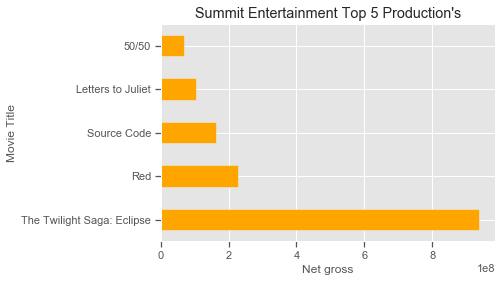

In [137]:
Sum_Top = Sum_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
Sum_Top.head().plot.barh(color= 'orange')
plt.title("Summit Entertainment Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

In [138]:
# opps this wasn't Sony it's Sum as in Summit Entertainment
Sum = Sum_Top.head(5)
type(Sum)

pandas.core.series.Series

In [139]:
# treemap example
# squarify.plot(sizes=Sum.profit, label=Sum.profit, alpha=.8 )
# plt.axis('off')
# plt.show()

#### WB studio ####

Text(0, 0.5, 'Movie Title')

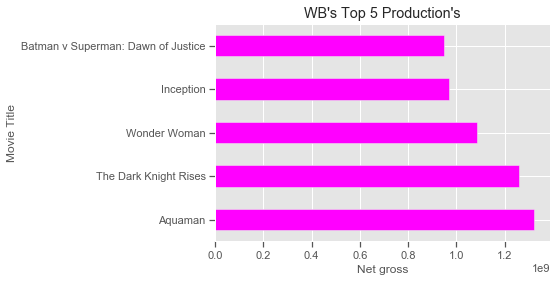

In [140]:
WB_Top = WB_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
WB_Top.head().plot.barh(color= 'magenta')
plt.title("WB's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

#### Buena Vista studio ####

Text(0, 0.5, 'Movie Title')

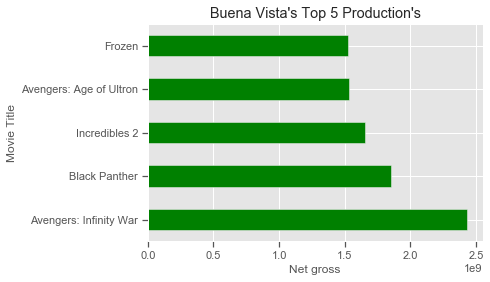

In [141]:
BV_Top = BV_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
BV_Top.head().plot.barh(color = 'green')
plt.title("Buena Vista's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

#### Paramount studio ####

Text(0, 0.5, 'Movie Title')

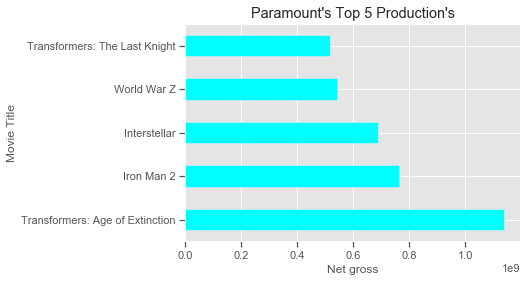

In [142]:
Par_Top = Par_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
Par_Top.head().plot.barh(color= 'cyan')
plt.title("Paramount's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

#### Dream Works studio ####

Text(0, 0.5, 'Movie Title')

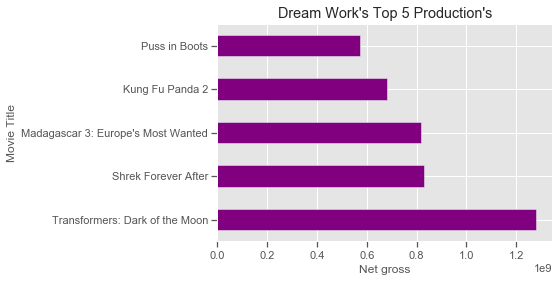

In [143]:
Dream_Works_Top = Dream_Works_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
Dream_Works_Top.head().plot.barh(color= 'purple')
plt.title("Dream Work's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

#### How voting average and popularity play a roll in a studios success? ####

In [144]:
"""the vote counts and popularity are very much similiar seeing as how these are 
the top budgeted movies in production where the vast amount of monies being generated
are solely from franchise films which have an unsurmountable following. """

'the vote counts and popularity are very much similiar seeing as how these are \nthe top budgeted movies in production where the vast amount of monies being generated\nare solely from franchise films which have an unsurmountable following. '

In [145]:
# simple merge for popularity and vote count comparison 
tmdb_bom_merge = pd.merge(bom_movie_gross, tmdb_movies, on = 'title')

Text(0.5, 0, 'Studio')

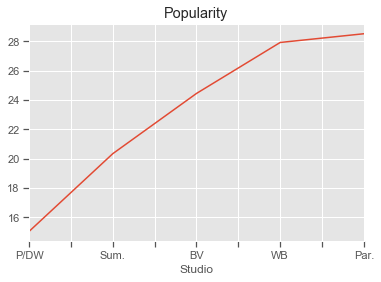

In [146]:
pop = tmdb_bom_merge.head().groupby('studio')['popularity'].agg('sum').sort_values(ascending= True)
pop.plot()
plt.title("Popularity")
plt.style.use('ggplot')
plt.xlabel('Studio')

Text(0.5, 0, 'Studio')

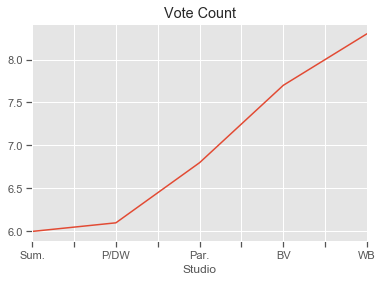

In [147]:
vote_avg = tmdb_bom_merge.head().groupby('studio')['vote_average'].agg('sum').sort_values(ascending= True)
vote_avg.plot()
plt.title("Vote Count")
plt.style.use('ggplot')
plt.xlabel('Studio')

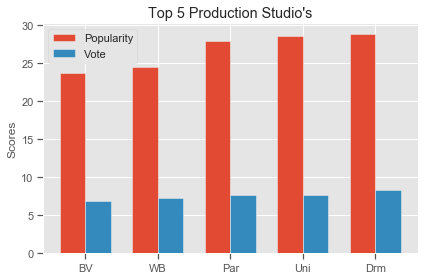

In [148]:
# top 5 studio bar graph net
# top 5 studio popularity 
# top 5 vote avg 
labels = ['BV', 'WB', 'Par', 'Uni', 'Drm']
vote = [6.8, 7.2, 7.7, 7.7, 8.3]
pop = [23.673, 24.445, 27.92 , 28.515, 28.734]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, pop, width, label = 'Popularity')
ax.bar(x + width/2, vote, width, label = 'Vote')
#ax.bar(x - width/2, pop, width, label ='Popularity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title("Top 5 Production Studio's")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

#### Conclusions & Recommendations ####
A. Ques: Who are the top studios in the industry, what are some of their top successes, does vote count and popularity   equate to positive box office receipts?
   1. Con: identified the top 5 studios in the industry as: Buena Vista, WarnerBros., Summit Entertainment, Dreamworks, and Paramount. Vote count and popularity showed a positive correlation when comparing studio performance based on global box office receipts.
   2. Rec: outright purchase a studio (along with it's franchises) or find an original script that can be nurtured into a     franchise and do as Hollywood does, rinse and repeat. All of the studio's are married to their franchises and a          large percentage of their box office receipts shows this in their bottom line. These films have the largest impact on production budgets.
   
    
A. Ques: What is the best/worst time to release a film?
   1. Con: The best month to release a film was indentified as June followed by: Nov, July, Dec, May, and April. 
   2. Rec: I would recommend following these as potential release dates but would also recommend that other market holidays and calendars be explored. Take for instance summer time in S.America and Austrailia or Xmas in Ethiopia. 

    
A. Ques: Does a domestic films popularity correlate to big box office numbers here in the States?
   1. Con: No correlation was found domestically between a movies popularity rating and domestic box office receipts. 
   2. Rec: I would recommend that the popularity metric be revamped, not sure what this value entails. Is this value based off global box office receipts or a comparison to other markets could shed some light on these figures. 
    
    

#### End Thank You ####